# Exersize 8.3
In this exersize, we will use logistic regression to simulate a discriminator in identifying real and fake points

In [1]:
import random 
import matplotlib.pyplot as plt #8.1
import numpy as np 
import copy
import math

## Data Generation
Generate "Real" and "Fake" Data
Randomly generates user inputed number of points of both real and fake data. The defualt value is 1000 points. The first argument of generate_points is to plot the generated data and the second argument is number of points. 

In [2]:
def generate_points(plot = True, num_points=1000):
    real = np.random.uniform(low=2, high=5, size=(num_points))
    fake = np.random.uniform(low=1, high=3, size=(num_points))
    if plot:
        y_real, y_fake = np.empty(num_points), np.empty(num_points)
        y_real.fill(0.6) #y values to so there's no overlap
        y_fake.fill(0.4)
        plt.scatter(real, y_real,  color="orange", s = 2)
        plt.scatter(fake, y_fake, color="green", s = 2)
        plt.axis([0, 6, 0, 1])
        plt.title('%d Randomly Generated Points' %num_points) 
        plt.show()
    return real, fake

Creates the data, and intializes hyperparameters for learning 

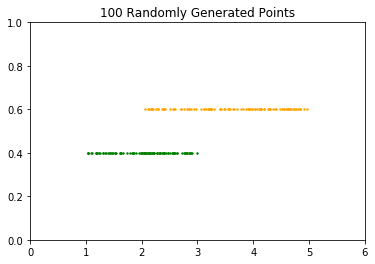

In [3]:
real, fake = generate_points(True, 100)
data = []
for i in range(len(real)): #append truth values 
    data.append((np.array([1, real[i]]),1)) #first term is folded bias term 
    data.append((np.array([1, fake[i]]),0))
    
data = np.array(data)
np.random.shuffle(data)

## Logistic Regression
Discriminator using Logistic Regression. We optimize using stochastic gradient decent. Hyperparameters are at the top of the cell. 

In [4]:
epoch = 1000
learner_rate = 0.1
decay = 0.99

def train_model(epoch, data, learner_rate, decay):
    weights = np.zeros(len(data[0][0])) #data is [(feature_vector, label),...]
    data = copy.copy(data) #prevent aliasing issues
    for _ in range(epoch):
        learner_rate = learner_rate*decay
        for feature_vector, label in data:  #implement shuffle 
            gradient_vector = compute_graident(weights, feature_vector, label)*(learner_rate*feature_vector) #formula
            weights = weights + gradient_vector
    return weights 

def compute_graident(weights, feature_vector, y):
    dot_product = np.dot(weights, feature_vector)
    if dot_product > 600: #so exp function doesn't overflow 
        return y - 1
    elif dot_product < -600:
        return y 
    else:
        exp_val = math.exp(dot_product)
        return y - ((exp_val)/(1+exp_val))

## Plot of Discriminator
Plot sigmoid function that we learned. 

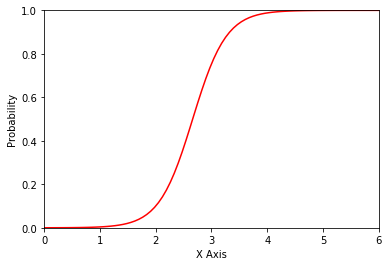

In [5]:
def plot_sigmoid(weight):
    x = np.linspace(0, 7, 100)
    z = weight[0] + (x*weight[1]) #weight[0] is the bias term 
    plt.plot(x, sigmoid(z), 'r')
    plt.axis([0, 6, 0, 1])
    plt.xlabel('X Axis')
    plt.ylabel('Probability')
    # create the graph
    plt.show()

def sigmoid(y): 
    return (1 / (1 + np.exp(-y)))

weights = train_model(epoch, data, learner_rate, decay)
plot_sigmoid(weights)

## Prediction 
Returns the probability of a point being real. 

In [6]:
point_value = 1.23

def predict(x, weight):
    z = weight[0] + (x*weight[1]) 
    return sigmoid(z)
    


print("Predicted probability of point being from the real data set = {0:.2f}".format(predict(point_value, weights)))

Predicted probability of point being from the real data set = 0.01
